In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsap
import statsmodels.tsa.arima.model as tsa_arima
import statsmodels.api as sm

In [68]:
columns = pd.read_csv('Indicadores20221007105052.csv').columns
df = pd.read_csv('Indicadores20221007105052.csv', names = columns)
df.drop(index=df.index[0], axis = 0, inplace = True)
df

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.2745518,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.7975011,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.4424238,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.5298659,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
5,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.9401523,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.61289973,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.86598396,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.94324936,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.02252106,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [69]:
df['Periodo'] = pd.to_datetime(df['Periodo'], infer_datetime_format = True)
df['Periodo']

1     2022-07-01
2     2022-06-01
3     2022-05-01
4     2022-04-01
5     2022-03-01
         ...    
351   1993-05-01
352   1993-04-01
353   1993-03-01
354   1993-02-01
355   1993-01-01
Name: Periodo, Length: 355, dtype: datetime64[ns]

In [70]:
df['Valor'] = df['Valor'].astype(float)
df['Valor']

1      111.274552
2      112.797501
3      114.442424
4      109.529866
5      111.940152
          ...    
351     63.612900
352     61.865984
353     63.943249
354     61.022521
355     60.407691
Name: Valor, Length: 355, dtype: float64

<AxesSubplot:xlabel='Periodo'>

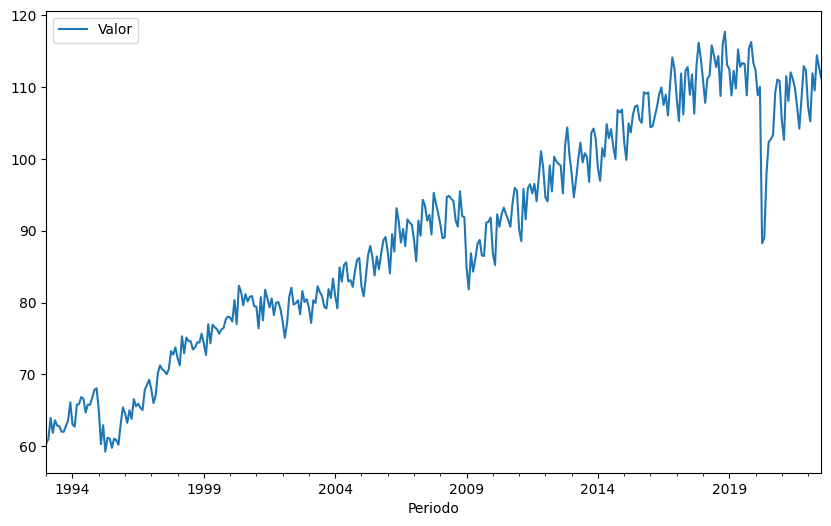

In [71]:
df.plot(x = 'Periodo', y = 'Valor', figsize = (10,6))

In [72]:
df_Stationality = df[['Periodo', 'Valor']]
df_Stationality

,Periodo,Valor
1,2022-07-01,111.274552
2,2022-06-01,112.797501
3,2022-05-01,114.442424
4,2022-04-01,109.529866
5,2022-03-01,111.940152
...,...,...
351,1993-05-01,63.612900
352,1993-04-01,61.865984
353,1993-03-01,63.943249
354,1993-02-01,61.022521


In [73]:
adfuller(df_Stationality['Valor'])

(0.1231934826507707,
 0.9676094071068196,
 17,
 337,
 {'1%': -3.4499043309021955,
  '5%': -2.870154885338925,
  '10%': -2.5713597190254385},
 1506.6592538949058)

In [74]:
df_Stationality.set_index(['Periodo'], inplace = True)

<AxesSubplot:xlabel='Periodo'>

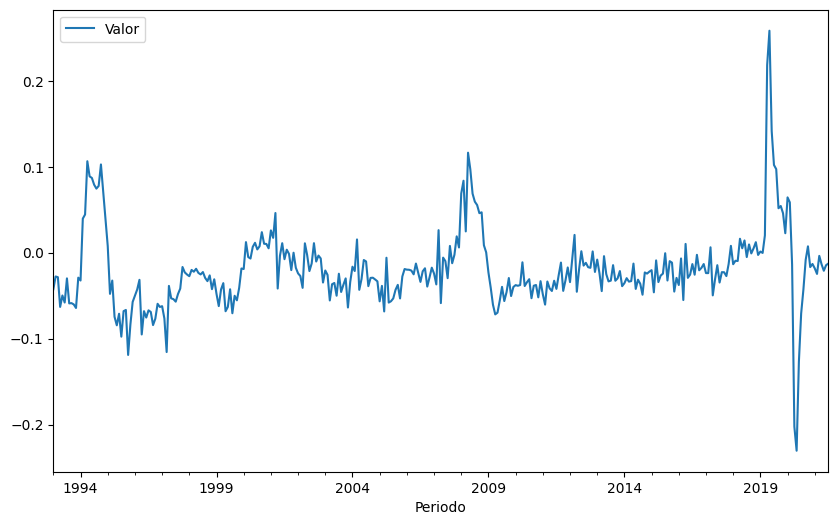

In [75]:
df_Stationality_transformed = pd.Series(np.log(df_Stationality['Valor'])).diff(12)
df_Stationality_transformed = df_Stationality_transformed.dropna()
df_Stationality_transformed = df_Stationality_transformed.to_frame(name='Valor')
df_Stationality_transformed.plot(figsize=(10,6))

Función de autocorrelación (ACF)

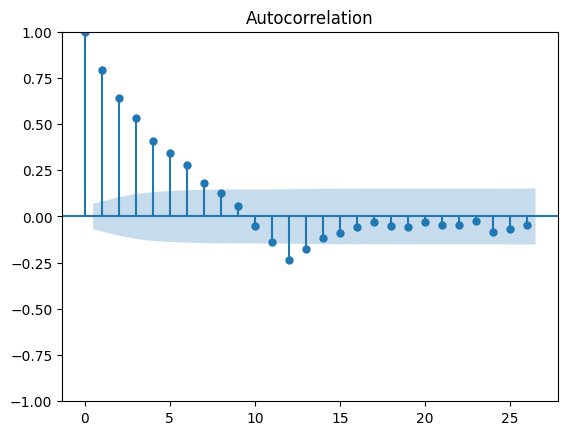

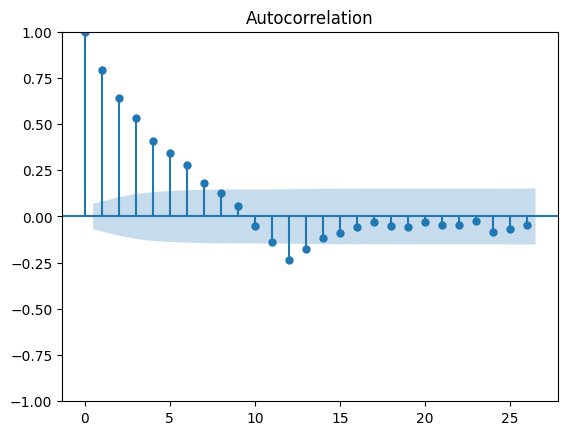

In [76]:
tsap.plot_acf(df_Stationality_transformed['Valor'], alpha = 0.2)

Función parcial de auto-correlación (PACF)

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


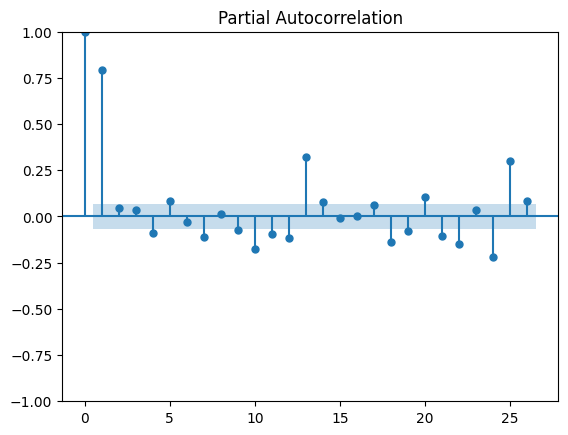

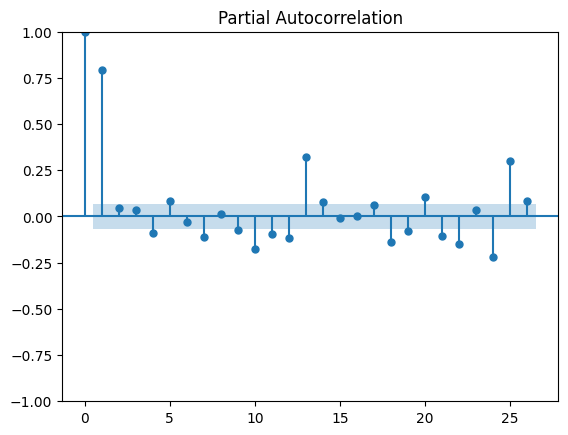

In [77]:
tsap.plot_pacf(df_Stationality_transformed, alpha=0.2)

Modelo ARIMA

In [78]:
arima_model = tsa_arima.ARIMA(df_Stationality_transformed, order = (1,1,1)).fit()
arima_model.summary()

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qb

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Valor   No. Observations:                  343
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 737.682
Date:                Fri, 21 Oct 2022   AIC                          -1469.364
Time:                        14:53:14   BIC                          -1457.859
Sample:                             0   HQIC                         -1464.781
                                - 343                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7941      0.016     48.408      0.000       0.762       0.826
ma.L1         -0.9996      0.175     -5.715      0.000      -1.342      -0.657
sigma2         0.0008      0.000      5.662      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):               950.62
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modelo SARIMA

In [79]:
sarima_model = sm.tsa.statespace.SARIMAX(df_Stationality_transformed, order = (1,1,1), seasonal_order = (1,1,1,12), enforce_stationarity=False, enforce_invertibility=False).fit()
sarima_model.summary()

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qb

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Valor   No. Observations:                  343
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 685.303
Date:                            Fri, 21 Oct 2022   AIC                          -1360.606
Time:                                    14:53:15   BIC                          -1341.827
Sample:                                         0   HQIC                         -1353.104
                                            - 343                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3131      0.119      2.622      0.009       0.079       0.547
ma.L1         -0.5863      0.120     -4.895      0.000      -0.821      -0.352
ar.S.L12      -0.3461      0.024    -14.189      0.000      -0.394      -0.298
ma.S.L12      -1.0002     36.730     -0.027      0.978     -72.990      70.990
sigma2         0.0007      0.025      0.027      0.978      -0.048       0.049
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3076.55
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -1.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""